# https://richdem.readthedocs.io/en/latest/intro.html

# Reading and Visualizing DEM with RasterIO:

In [1]:
import numpy as np
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt

dem = rio.open("/Volumes/Extreme SSD/topg_europa/tif/10_DEM_y50x-120.tif")
dem_array = dem.read(1).astype('float64')

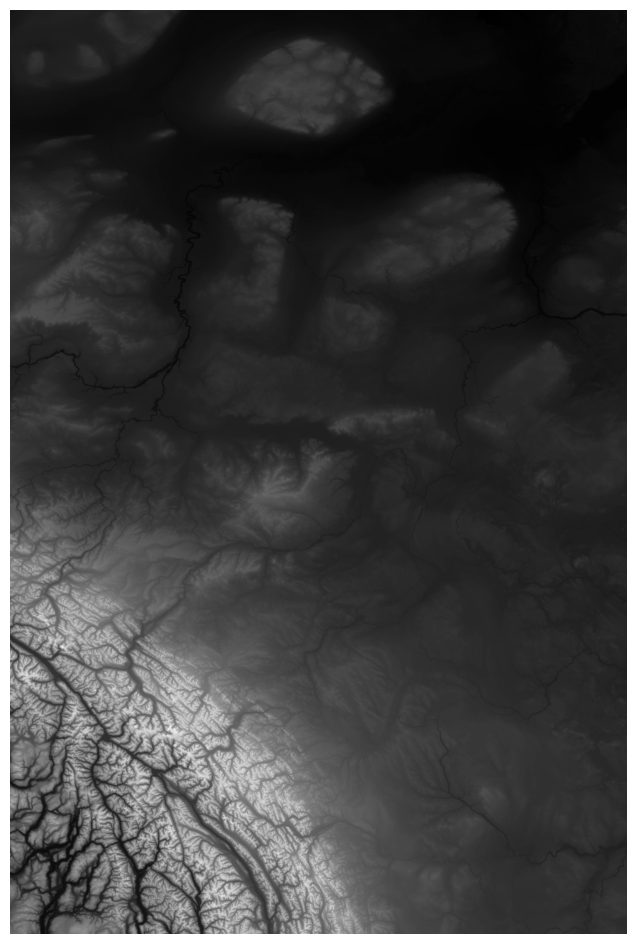

In [2]:
# Basic Visualization
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='Greys_r', ax=ax)
plt.axis("off")
plt.show()

# Modifying & Analyzing DEM with RichDEM:

In [3]:
import richdem as rd

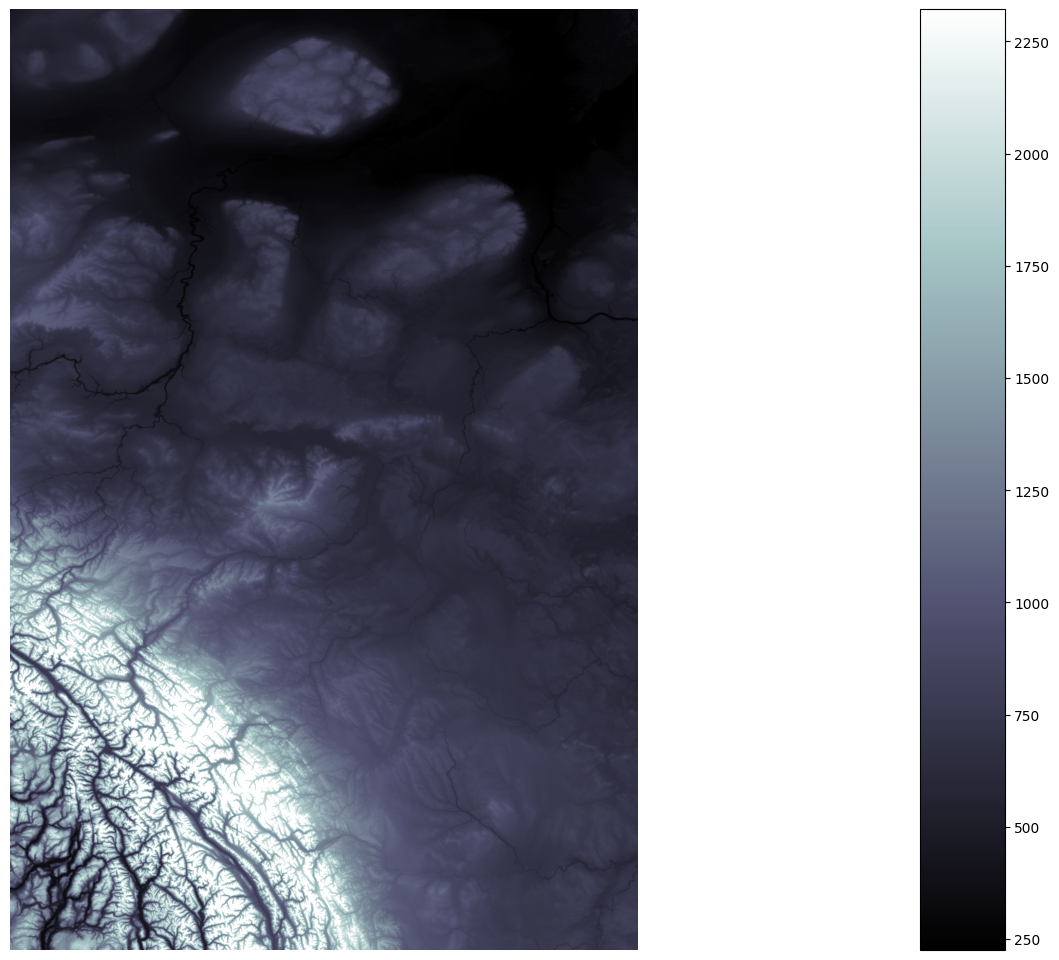

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Slope calculation (degrees)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 10.6898                         ] (10% - 95.7s - 1 threads)


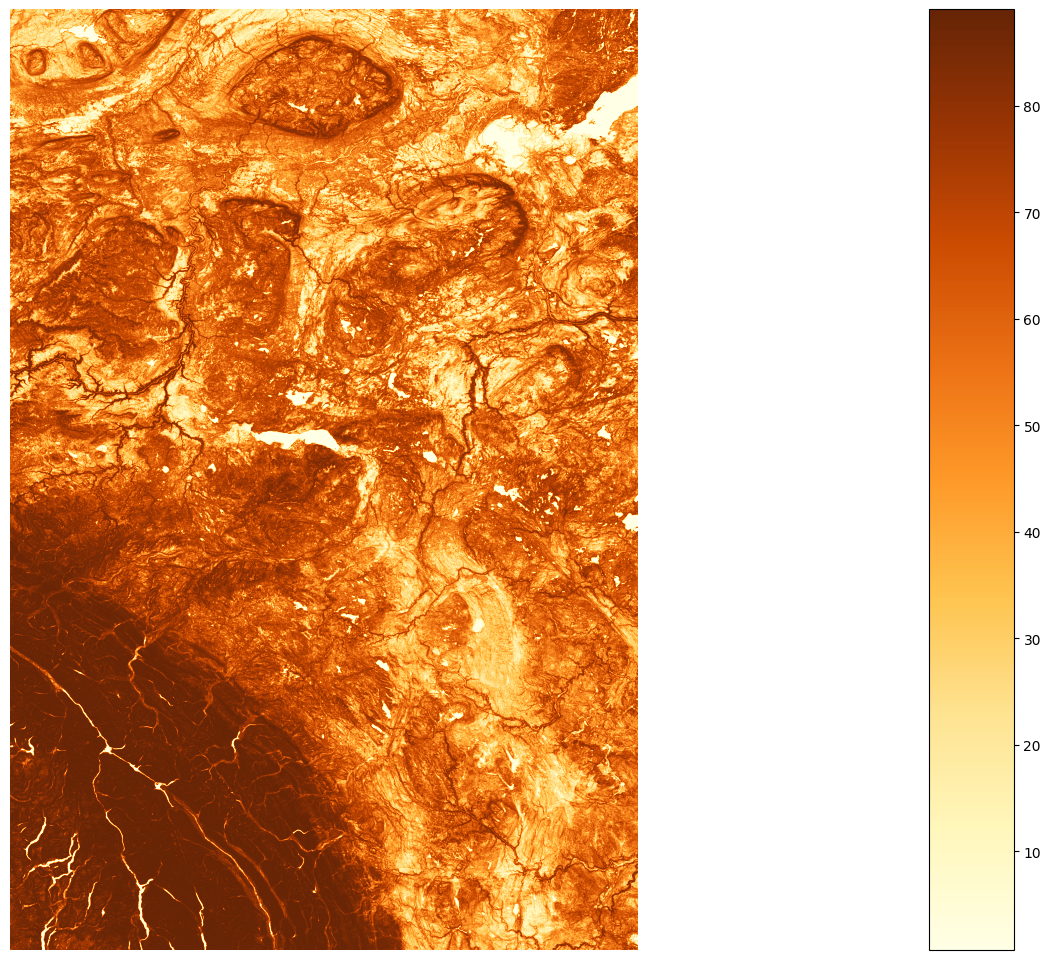

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Priority-Flood (Zhou2016 version)
C Zhou, G., Sun, Z., Fu, S., 2016. An efficient variant of the Priority-Flood algorithm for filling depressions in raster digital elevation models. Computers & Geosciences 90, Part A, 87 – 96. doi:http://dx.doi.org/10.1016/j.cageo.2016.02.021

t Zhou2016 wall-time = 41.4685 s


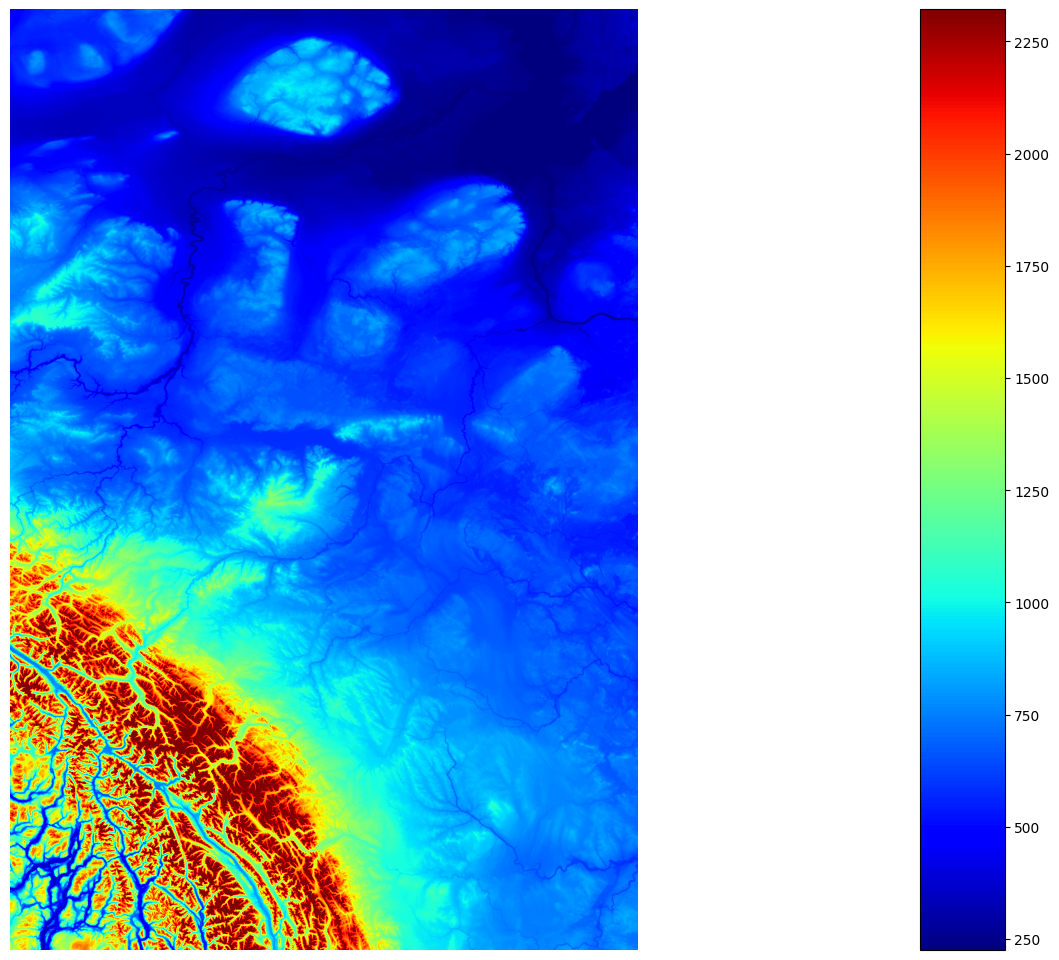

In [4]:
# Converting to RichDEM array
dem_richdem = rd.rdarray(dem_array, no_data=-9999)

# DEM Visualization with RichDEM
fig = rd.rdShow(dem_richdem, axes=False, cmap='bone', figsize=(16, 10))
fig

# Creating Slope Visualization
dem_slope = rd.TerrainAttribute(dem_richdem, attrib='slope_degrees')
rd.rdShow(dem_slope, axes=False, cmap='YlOrBr', figsize=(16, 10))

# Filling Depressions
dem_filled = rd.FillDepressions(dem_richdem, in_place=False)
dem_filled_fig = rd.rdShow(dem_filled, ignore_colours=[0], axes=False, cmap='jet', vmin=fig['vmin'], vmax=fig['vmax'], figsize=(16, 10))